# CSE527 Programming Assignment 3
**Due date: 2021.11.11 23:59 PM**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6.9**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```
    pip show pip
    pip --version
    pip -V
```

In case of the wrong version, use `pip3` for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open this notebook file with your Jupyter Notebook and do your homework there.*




In [1]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Replace -----/-----/-----/' with the path such that "CSE527-PA3-fall21" is your working directory
%cd '/content/gdrive/MyDrive/CSE527/CSE527-PA3-fall21'

/content/gdrive/MyDrive/CSE527/CSE527-PA3-fall21


In [3]:
# pip install the OpenCV version from 'contrib'
%pip install opencv-contrib-python==3.4.2.17
import cv2
print(cv2.__version__) # verify OpenCV version

     |████████████████████████████████| 30.6 MB 27 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
3.4.2


## Problem 1 Pedestrian detection with HOG feature and Nearest Neighbor classifier.(80 + 10 points)


## **Description**

---
In this problem, you will implement a multi-resolution, multi-scale framework for detecting pedestrians. The details for the algorithm can be found in this paper:
 
W. Zhang, G. Zelinsky, and D. Samaras. Real-time Accurate Object Detection using Multiple Resolutions. In ICCV07. 
 
You will have a set of positive images (with pedestrians) and negative images (without pedestrians). Each image is downsampled to create images of multiple resolutions. In each image, HOG features are calculated for multiple window locations. Using these features, build a Nearest Neighbor(NN) classifier for detecting pedestrians for each resolution, and these classifiers are used in the test images to find pedestrians. 

## **Dataset**
---
For this problem, you will use the INRIA person dataset (Dalal and Triggs. Histograms of Oriented Gradients for Human Detection. In CVPR05, see cvpr05.pdf). 

The dataset consists of positive images (with people) and negative images (without people), along with corresponding annotation files. It also contains positive images cropped in `96x160` pixel format. You can download the dataset from:
 
ftp://ftp.inrialpes.fr/pub/lear/douze/data/INRIAPerson.tar

After you download the dataset, unzip it and upload the `INRIAPerson` folder to your working directory.

## **0.Initial setup(0 points)**
---
a. Choose your downsampling ratio for scale and resolution. Let us denote the resolution ratio as $\alpha$, and the scale ratio as $\beta$. For example, if you want the resolution to be halved at each level, then $\alpha=2$. 
Based on these ratios, define your resolution & scale space. The resolution will be $r = 1,...,R$, where 1 represents the lowest resolution and $R$ is the highest resolution (which is the original image resolution). Similarly, the scale will be $s = 1,...,S$, where 1 represents the largest object and $S$ is the smallest. In this homework, you can start at $\alpha=2$, $\beta=1.5$, $R=4$, and $S=5$.

b. Decide your initial object window size $(w,h)$. Since the INRIA dataset already contains cropped image patches of size `96x160`, it would be a good idea to use the same size for your largest window. </br>
**You can unzip the dataset on Colab to increase the loading speed.**

## **1.Preparing Dataset(5 points)**
---
a. {**5** points} Load a set of positive image patches (which contain people) directly from `INRIAPerson\train_64x128_h96\pos.lst`. And create a set of negative image patches (which have the same size as the positives but don't contain people) from the negative training images `INRIAPerson\train_64x128_h96\neg.lst`. These original positive and negative patches belong to the full resolution level ($r = R$). **Show 5 positive and 5 negative patches in a `2x5` cell.**


## **2.Building NN Classifier(25 points)**
---

a. {**10** points} Downsample the full resolution image patches to your lowest resolution. In other words, downsample them with a ratio of $\alpha^{R-r}$. Then extract HOG features from all patches. Use the block-based HOG feature extraction that is described in the paper (section 2.3). Check Table 3 in the paper to find the parameters for each HOG feature extractor. **Report the image shape of each downsampling resolution(i.e., width and height).**
**Hint:** 
1. **Use `cv2.resize` to downsample.**
---
b. {**5** points} Build a Nearest Neighbor(NN) classifier for HOG features of the lowest resolution. Label the features from the positive patches as positive instances, and those from the negative patches as negative instances. We'll denote this classifier as $C_R$. 

---
c. {**10** points} Repeat steps a and b for each resolution $r = 2,..., R$. Build a Nearest Neighbor(NN) classifier $C_r$ for features in resolution $r$. In the end you should have $R$ separate classifiers. **Evaluate each classifier and reprot the accuracy. You should evaluate the classifier on `INRIAPerson\test_64x128_h96\neg.lst` and `INRIAPerson\test_64x128_h96\pos.lst`**

## **3.Detection(30 points)**
---
a. {**5** points} Start with the lowest resolution ($r = 1$) by reducing your window size by a factor of $\alpha^{R - 1}$. For each scale $s = 1,..., S$, downsample the **original** image with a ratio of $\alpha^{R - 1}\beta^{S - s}$, but keep the window size fixed. By doing this, you are keeping the feature resolution but changing the object size in effect. Apply the classifier $C_1$ to each possible window position in the image with a stride `2x2` pixels. Mark each positive window for the higher resolution.

b. {**10** points} Go to the next lowest resolution (e.g. $r = 2$). Your detection window should now be $\frac{1}{\alpha^{R - 2}}$ of the original size. Again, for each scale $s = 1,...,S$, downsample the image **from the original image** accordingly. For each scale, apply the classifier $C_2$ to windows that were marked as positive in the previous resolution. And keep the remained positive windows for the next resolution.

c. {**15** points} Repeat step b for all other resolutions ($r = 3,..., R$). Generate a mask, which has the same width and height as the input image, using the detection results from the highest level. For each mask, all the positive windows should be marked with 1 and other areas should be 0.

## **4.Evaluation(20 points)**
---
{**20 points**} Run pedestrian detection tests using the INRIA testing image set from `INRIAPerson\Test\pos.lst`. After you run the test, calculate the mean Intersection over Union (IoU) on the testing set to evaluate the performance of your detector. Check [Intersection over Union (IoU) for object detection](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) to learn how to calculate IoU.

The ground truth masks that are provided in the INRIA dataset have been loaded as `test_gt_mask`. Run the test with different parameters (resolution and scale ratio, etc.) to achieve an IoU as higher as possible.

**Hint:** 
1. **Use `cv2.bitwise_*` between the annotation and the mask.**

**Note**: 
- **You need to get at least 0.075 IOU to get full points for this problem.**

## **3.Bonus Problem(Bonus 10 points)**

You need to get at least **0.2** IOU to get the bonus. For this, you can use any methods you want.


##1.Preparing Dataset

In [8]:
pos, neg, test_pos, test_neg, test_pos_eval = [], [], [], [], []

#Train Images
with open('INRIAPerson/train_64x128_H96/pos.lst', 'r') as filehandle:
    for line in filehandle:
        pos.append('INRIAPerson/96X160H96/Train'+line[5:-1])
with open('INRIAPerson/train_64x128_H96/neg.lst', 'r') as filehandle:
    for line in filehandle:
        neg.append('INRIAPerson/Train'+line[5:-1])

#Test Images
with open('INRIAPerson/test_64x128_H96/pos.lst', 'r') as filehandle:
  for line in filehandle:
    test_pos.append('INRIAPerson/70X134H96/Test/'+line[4:-1])
with open('INRIAPerson/test_64x128_H96/neg.lst', 'r') as filehandle:
  for line in filehandle:
    test_neg.append('INRIAPerson/Test'+line[4:-1])

with open('INRIAPerson/Test/pos.lst', 'r') as filehandle:
    for line in filehandle:
        test_pos_eval.append('INRIAPerson/Test'+line[4:-1])

In [9]:
len(pos), len(neg), len(test_pos), len(test_neg), len(test_pos_eval)

(2416, 1218, 1132, 453, 288)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random
# The following steps are just for your reference
# You can write in your own way

#Sample setting you can refer to
alpha = 2
beta = 1.5
window_size = (96, 160)
resolution_levels = 4
scale_levels = 5

In [13]:
#Load Train Patches
def loadData(paths):
    img = [cv2.imread(path) for path in paths]
    return img

imgs_pos = loadData(pos)
imgs_neg = loadData(neg)


In [5]:
import pickle
with open('imgs_pos.pkl', 'rb') as pickle_in:
     imgs_pos = pickle.load(pickle_in)
with open('imgs_neg.pkl', 'rb') as pickle_in:
     imgs_neg = pickle.load(pickle_in)
with open('imgs_test_neg.pkl', 'rb') as pickle_in:
     imgs_test_neg = pickle.load(pickle_in)
with open('imgs_test_pos.pkl', 'rb') as pickle_in:
     imgs_test_pos = pickle.load(pickle_in)
with open('imgs_eval_pos.pkl', 'rb') as pickle_in:
     imgs_eval_pos = pickle.load(pickle_in)

In [15]:
with open('imgs_pos.pkl', 'wb') as fid:
     pickle.dump(imgs_pos, fid)
with open('imgs_neg.pkl', 'wb') as fid:
     pickle.dump(imgs_neg, fid)

In [16]:
imgs_test_pos = loadData(test_pos)
imgs_test_neg = loadData(test_neg)

In [19]:
with open('imgs_test_pos.pkl', 'wb') as fid:
     pickle.dump(imgs_test_pos, fid)
with open('imgs_test_neg.pkl', 'wb') as fid:
     pickle.dump(imgs_test_neg, fid)

In [20]:
imgs_eval_pos = loadData(test_pos_eval)

In [21]:
with open('imgs_eval_pos.pkl', 'wb') as fid:
     pickle.dump(imgs_eval_pos, fid)

In [8]:
imgs_pos[0].shape, imgs_neg[0].shape

((160, 96, 3), (240, 320, 3))

In [9]:
imgs_test_pos[0].shape, imgs_test_neg[0].shape, imgs_eval_pos[0].shape

((134, 70, 3), (240, 320, 3), (720, 491, 3))

In [12]:
crop_imgs_test_pos = [cv2.resize(i, window_size) for i in imgs_test_pos if i is not None]

In [13]:
len(crop_imgs_test_pos)

1126

In [14]:
x, y = 0, 0
h, w = 160, 96
def cropImageBatch(imgs):
  return [i.copy()[y:y+h, x:x+w] for i in imgs]

crop_imgs_neg = cropImageBatch(imgs_neg)
#crop_imgs_eval_pos = cropImageBatch(imgs_eval_pos)
crop_imgs_test_neg = cropImageBatch(imgs_test_neg)

In [15]:
imgs_pos[0].shape, crop_imgs_neg[0].shape, crop_imgs_test_pos[0].shape, crop_imgs_test_neg[0].shape

((160, 96, 3), (160, 96, 3), (160, 96, 3), (160, 96, 3))

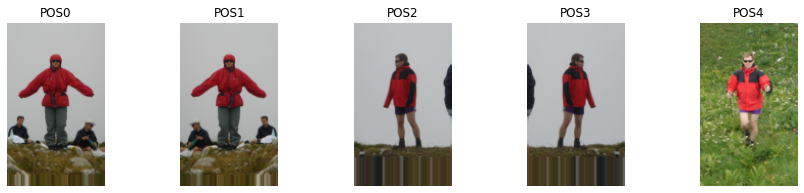

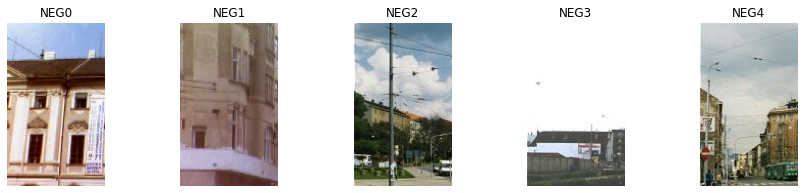

In [ ]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('POS{}'.format(i))
    rgb = cv2.cvtColor(imgs_pos[i+100], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.axis("off")
plt.show()
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('NEG{}'.format(i))
    rgb = cv2.cvtColor(crop_imgs_neg[i+10], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.axis("off")
plt.show()

## 2.Building NN Classifier

In [31]:
for r in range(resolution_levels, 0, -1):
  scale = 1/alpha**(resolution_levels-r)
  img_size = (int(96*scale), int(160*scale))
  print((96, 160), img_size)


(96, 160) (96, 160)
(96, 160) (48, 80)
(96, 160) (24, 40)
(96, 160) (12, 20)


In [8]:
ppc = [(3,3), (4,4), (6,6), (8,8)]
orientation = [9, 9, 9, 18]

In [18]:
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier

classifiers = []
res_desc_pos_imgs = {}
res_desc_neg_imgs = {}

for r in range(1, resolution_levels+1):
  scale = 1/alpha**(resolution_levels-r)
  img_size = (int(window_size[0]*scale), int(window_size[1]*scale))
  print("Resolution : {}".format(img_size))

  train_start_time = time.time()
  
  #NEG
  hog_neg_descriptors = []
  hog_neg_imgs = []

  for i in range(len(crop_imgs_neg)):
      img = crop_imgs_neg[i]
      downsample_image = cv2.resize(img, img_size)

      hog_neg_descriptor, hog_neg_img = hog(downsample_image,  # input image
                                            orientations=orientation[r-1],  # number of bins
                                            pixels_per_cell=ppc[r-1], # pixel per cell
                                            cells_per_block=(2,2), # cells per blcok
                                            block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                            visualize=True) # return HOG map

      hog_neg_descriptors.append(hog_neg_descriptor)
      hog_neg_imgs.append(hog_neg_img)

  res_desc_neg_imgs[img_size] = [hog_neg_descriptors, hog_neg_imgs]

  #POS
  hog_pos_descriptors = []
  hog_pos_imgs = []

  for i in range(len(imgs_pos)):
      img = imgs_pos[i]
      downsample_image = cv2.resize(img, img_size)

      hog_pos_descriptor, hog_pos_img = hog(downsample_image,  # input image
                                            orientations=orientation[r-1],  # number of bins
                                            pixels_per_cell=ppc[r-1], # pixel per cell
                                            cells_per_block=(2,2), # cells per blcok
                                            block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                            visualize=True) # return HOG map

      hog_pos_descriptors.append(hog_pos_descriptor)
      hog_pos_imgs.append(hog_pos_img)

  res_desc_pos_imgs[img_size] = [hog_pos_descriptors, hog_pos_imgs]

  hog_pos_neg = hog_pos_descriptors + hog_neg_descriptors
  labels = [1 for _ in range(len(hog_pos_descriptors))] + [-1 for _ in range(len(hog_neg_descriptors))]
  
  train_elapsed_time = time.time() - train_start_time
  print('Total time to generate HOG Descriptors for Classifier {}: {}s'.format(r, train_elapsed_time))

  #KNN
  train_start_time = time.time()
  k=2
  cl = KNeighborsClassifier(n_neighbors=k, weights='distance')
  cl.fit(np.array(hog_pos_neg), labels)
  classifiers.append(cl)
  train_elapsed_time = time.time() - train_start_time
  print('Total time to train K-Neighbors Classifier {} on {} histograms: {}s'.format(r,len(hog_pos_neg), train_elapsed_time))

Resolution : (12, 20)
Total time to generate HOG Descriptors for Classifier 1: 16.973193168640137s
Total time to train K-Neighbors Classifier 1 on 3634 histograms: 0.19443392753601074s
Resolution : (24, 40)
Total time to generate HOG Descriptors for Classifier 2: 41.655884981155396s
Total time to train K-Neighbors Classifier 2 on 3634 histograms: 0.6056153774261475s
Resolution : (48, 80)
Total time to generate HOG Descriptors for Classifier 3: 74.12382054328918s
Total time to train K-Neighbors Classifier 3 on 3634 histograms: 1.0752859115600586s
Resolution : (96, 160)
Total time to generate HOG Descriptors for Classifier 4: 318.8766174316406s
Total time to train K-Neighbors Classifier 4 on 3634 histograms: 5.433685302734375s


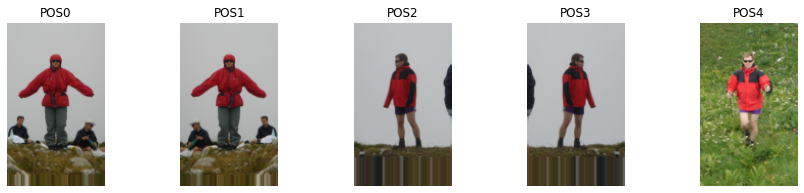

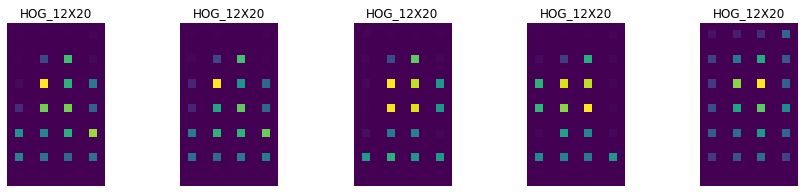

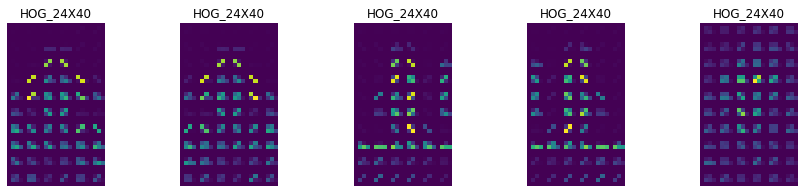

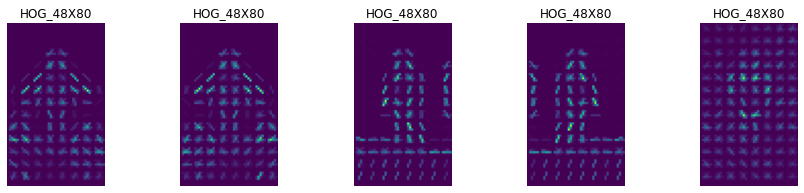

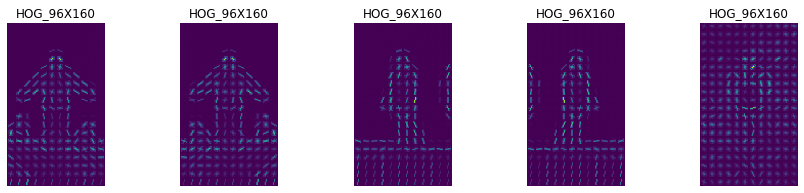

In [ ]:
#ORIG IMAGE
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('POS{}'.format(i))
    rgb = cv2.cvtColor(imgs_pos[i+100], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.axis("off")
plt.show()

#(12,20)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_12X20')
  plt.imshow(res_desc_pos_imgs[(12,20)][1][i+100])
  plt.axis('off')
plt.show()

#(24,40)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_24X40')
  plt.imshow(res_desc_pos_imgs[(24,40)][1][i+100])
  plt.axis('off')
plt.show()

#(48,80)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_48X80')
  plt.imshow(res_desc_pos_imgs[(48,80)][1][i+100])
  plt.axis('off')
plt.show()

#(96,160)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_96X160')
  plt.imshow(res_desc_pos_imgs[(96,160)][1][i+100])
  plt.axis('off')
plt.show()

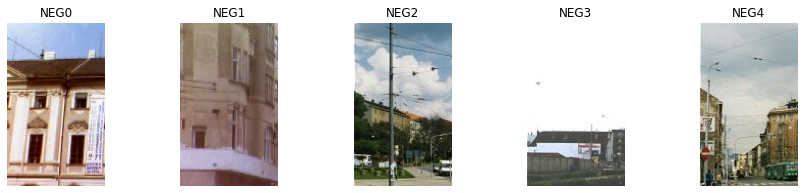

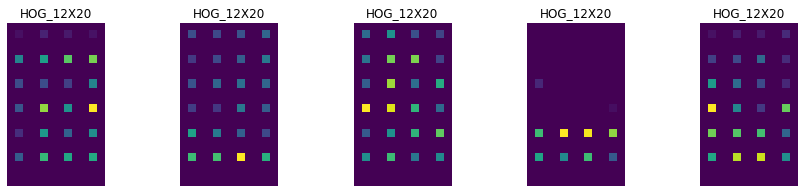

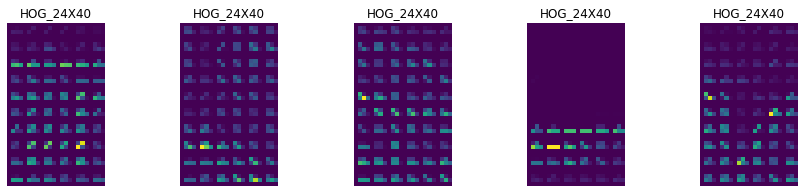

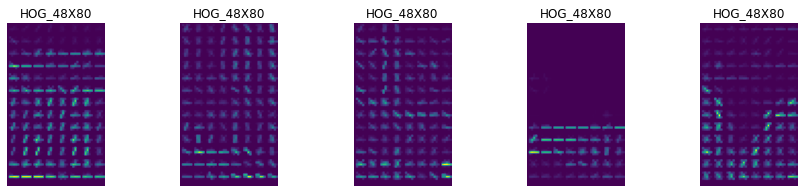

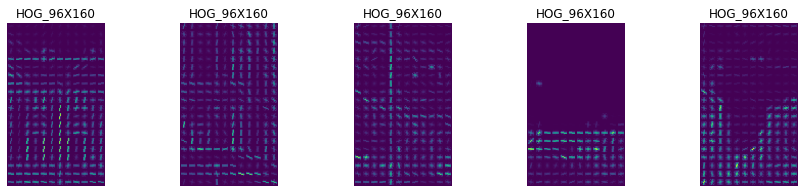

In [ ]:
#ORIG IMAGE
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('NEG{}'.format(i))
    rgb = cv2.cvtColor(crop_imgs_neg[i+10], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.axis("off")
plt.show()

#(12,20)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_12X20')
  plt.imshow(res_desc_neg_imgs[(12,20)][1][i+10])
  plt.axis('off')
plt.show()

#(24,40)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_24X40')
  plt.imshow(res_desc_neg_imgs[(24,40)][1][i+10])
  plt.axis('off')
plt.show()

#(48,80)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_48X80')
  plt.imshow(res_desc_neg_imgs[(48,80)][1][i+10])
  plt.axis('off')
plt.show()

#(96,160)
plt.figure(figsize=(15, 3))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title('HOG_96X160')
  plt.imshow(res_desc_neg_imgs[(96,160)][1][i+10])
  plt.axis('off')
plt.show()

Evaluation

In [19]:
res_desc_test_pos_imgs = {}
res_desc_test_neg_imgs = {}

for r in range(1, resolution_levels+1):
  scale = 1/alpha**(resolution_levels-r)
  img_size = (int(window_size[0]*scale), int(window_size[1]*scale))
  print("Resolution : {}".format(img_size))

  train_start_time = time.time()
  
  #NEG
  hog_test_neg_descriptors = []
  hog_test_neg_imgs = []

  for i in range(len(crop_imgs_test_neg)):
      img = crop_imgs_test_neg[i]
      downsample_image = cv2.resize(img, img_size)

      hog_test_neg_descriptor, hog_test_neg_img = hog(downsample_image,  # input image
                                                      orientations=orientation[r-1],  # number of bins
                                                      pixels_per_cell=ppc[r-1], # pixel per cell
                                                      cells_per_block=(2,2), # cells per blcok
                                                      block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                                      visualize=True) # return HOG map

      hog_test_neg_descriptors.append(hog_test_neg_descriptor)
      hog_test_neg_imgs.append(hog_test_neg_img)

  res_desc_test_neg_imgs[img_size] = [hog_test_neg_descriptors, hog_test_neg_imgs]

  #POS
  hog_test_pos_descriptors = []
  hog_test_pos_imgs = []

  for i in range(len(crop_imgs_test_pos)):
      img = crop_imgs_test_pos[i]
      downsample_image = cv2.resize(img, img_size)

      hog_test_pos_descriptor, hog_test_pos_img = hog(downsample_image,  # input image
                                                      orientations=orientation[r-1],  # number of bins
                                                      pixels_per_cell=ppc[r-1], # pixel per cell
                                                      cells_per_block=(2,2), # cells per blcok
                                                      block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                                      visualize=True) # return HOG map

      hog_test_pos_descriptors.append(hog_test_pos_descriptor)
      hog_test_pos_imgs.append(hog_test_pos_img)

  res_desc_test_pos_imgs[img_size] = [hog_test_pos_descriptors, hog_test_pos_imgs]

  hog_test_pos_neg = hog_test_pos_descriptors + hog_test_neg_descriptors
  test_labels = [1 for _ in range(len(hog_test_pos_descriptors))] + [-1 for _ in range(len(hog_test_neg_descriptors))]
  
  train_elapsed_time = time.time() - train_start_time
  print('Total time to generate HOG Descriptors: {}s'.format(train_elapsed_time))


Resolution : (12, 20)
Total time to generate HOG Descriptors: 7.385623931884766s
Resolution : (24, 40)
Total time to generate HOG Descriptors: 17.92254614830017s
Resolution : (48, 80)
Total time to generate HOG Descriptors: 32.081560373306274s
Resolution : (96, 160)
Total time to generate HOG Descriptors: 138.72802758216858s


In [20]:
res = [(12,20), (24,40), (48,80), (96,160)]
for i, res_i in enumerate(res):
  test = res_desc_test_pos_imgs[res_i][0] + res_desc_test_neg_imgs[res_i][0]
  labels_test_pred = classifiers[i].predict(test)
  print('Classifier:' , i+1, 'Accuracy: ', np.mean(labels_test_pred.astype(np.int32)==np.array(test_labels).reshape(-1))*100, '%')

Classifier: 1 Accuracy:  78.46738442051931 %
Classifier: 2 Accuracy:  86.44711842938568 %
Classifier: 3 Accuracy:  81.8239392020266 %
Classifier: 4 Accuracy:  78.40405319822673 %


In [21]:
with open('classifiers.pkl', 'wb') as fid:
     pickle.dump(classifiers, fid)

## 3.Detection

In [51]:
with open('classifiers.pkl', 'rb') as pickle_in:
     classifiers = pickle.load(pickle_in)

In [65]:
import os
strides = [2, 1, 1, 1]
score_matrix = {}

all_bb_detections = {}
start_time = time.time()
for im_i, im in enumerate(imgs_eval_pos[0:50]):
  print("Test Image {}, Shape {}".format(im_i, im.shape))
  S = 1
  beta_test = beta = 1.5
  img = im.copy()
  while((img.shape[0]/beta_test) > 160 and (img.shape[1]/beta_test) > 96):
    S = S+1
    beta_test = beta_test**beta
  locations = 0
  for res in range(1, resolution_levels+1):
      res_ratio = 1/(alpha**(resolution_levels - res))
      window = (int(np.floor(window_size[1]*res_ratio)), int(np.floor(window_size[0]*res_ratio))) 
      print("Proposal:", window)

      for scale in range(1, S+1):
        sc_ratio = res_ratio * (1/(beta**(S-scale)))
        img_size = (int(np.floor(img.shape[1]*sc_ratio)), int(np.floor(img.shape[0]*sc_ratio)))
        downsample_image = cv2.resize(img, img_size)
        score_matrix[(res, scale)] = np.zeros((downsample_image.shape[0], downsample_image.shape[1]))
        print("Downsampled Image Size:", score_matrix[(res, scale)].shape)

        for y in range(0, downsample_image.shape[0] - window[0]+1, strides[res-1]):
          for x in range(0, downsample_image.shape[1]-window[1]+1, strides[res-1]):
              #[int(np.floor((y+alpha-1)/alpha)), int(np.floor((x+alpha-1)/alpha))]
              if res==1: #or score_matrix[(res-1, scale)][int(np.floor((y+alpha+alpha*(strides[res-2]-strides[res-1]))/alpha)), int(np.floor((x+alpha+alpha*(strides[res-2]-strides[res-1]))/alpha))] == 1):
                #print(res)
                detector = downsample_image[y:y+window[0], x:x+window[1]] 
                
                hog_desc, hog_img = hog(detector,  # input image
                                        orientations=orientation[res-1],  # number of bins
                                        pixels_per_cell=ppc[res-1], # pixel per cell
                                        cells_per_block=(2,2), # cells per blcok
                                        block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                        visualize=True) # return HOG map
                #print(hog_desc.shape)
                pred = classifiers[res-1].predict_proba(hog_desc.reshape(1,-1))
                score = pred[0][1]
                if score > 0.45:
                  score_matrix[(res, scale)][y,x] = 1

        if res != 1:
          proposals = np.transpose(np.nonzero(score_matrix[(res-1,scale)]))
          print("Res {} Scale {} : {} Proposals ".format(res-1, scale, len(proposals)))
          for y, x in proposals:
            detector = downsample_image[y:y+window[0], x:x+window[1]] 
                    
            hog_desc, hog_img = hog(detector,  # input image
                                    orientations=orientation[res-1],  # number of bins
                                    pixels_per_cell=ppc[res-1], # pixel per cell
                                    cells_per_block=(2,2), # cells per blcok
                                    block_norm = 'L2-Hys', #  block norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}
                                    visualize=True) # return HOG map
            #print(hog_desc.shape)
            pred = classifiers[res-1].predict_proba(hog_desc.reshape(1,-1))
            score = pred[0][1]
            if score > 0.45:
              score_matrix[(res, scale)][y,x] = 1
              #print(res, scale, y,x)
              #l = positive_matches[scale] 
              #positive_matches[scale] = l.append((y,x))
              if res == resolution_levels:
                locations = locations + 1    

  all_bb_detections[im_i] = []
  for s in range(1 ,S+1):
    r, c = score_matrix[(resolution_levels-1, s)].shape
    for row in range(0, r):
      for col in range(0, c):
        if score_matrix[(resolution_levels-1, s)][row,col] == 1:
          pt1 = (int(np.floor(col*beta**(S-s))),int(np.floor(row*beta**(S-s))))
          pt2 = (int(np.floor(window_size[0]*beta**(S-s))),int(np.floor(window_size[1]*beta**(S-s))))
          ms = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
          mask = cv2.rectangle(ms, pt1, pt2, 1, -1)
          #print(mask.shape)
          cv2.rectangle(img, pt1,  pt2, (255,0,0),2)
          all_bb_detections[im_i].append(mask)
          #print(mask)
  print("Time taken for detection over {} images: {}".format(im_i+1, (time.time() - start_time)))
  if not os.path.exists("Results"):
    os.makedirs("Results")
  cv2.imwrite("Results/Res_{}.jpg".format(im_i), img)
  if im_i % 10 == 0:
    with open('all_bb_detections_{}.pkl'.format(im_i), 'wb') as fid:
     pickle.dump(all_bb_detections, fid)
  # rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # plt.imshow(rgb, cmap = plt.cm.Spectral)

Test Image 0, Shape (720, 491, 3)
Proposal: (20, 12)
Downsampled Image Size: (17, 12)
Downsampled Image Size: (26, 18)
Downsampled Image Size: (40, 27)
Downsampled Image Size: (60, 40)
Downsampled Image Size: (90, 61)
Proposal: (40, 24)
Downsampled Image Size: (35, 24)
Res 1 Scale 1 : 0 Proposals 
Downsampled Image Size: (53, 36)
Res 1 Scale 2 : 14 Proposals 
Downsampled Image Size: (80, 54)
Res 1 Scale 3 : 78 Proposals 
Downsampled Image Size: (120, 81)
Res 1 Scale 4 : 266 Proposals 
Downsampled Image Size: (180, 122)
Res 1 Scale 5 : 683 Proposals 
Proposal: (80, 48)
Downsampled Image Size: (71, 48)
Res 2 Scale 1 : 0 Proposals 
Downsampled Image Size: (106, 72)
Res 2 Scale 2 : 11 Proposals 
Downsampled Image Size: (160, 109)
Res 2 Scale 3 : 49 Proposals 
Downsampled Image Size: (240, 163)
Res 2 Scale 4 : 115 Proposals 
Downsampled Image Size: (360, 245)
Res 2 Scale 5 : 226 Proposals 
Proposal: (160, 96)
Downsampled Image Size: (142, 96)
Res 3 Scale 1 : 0 Proposals 
Downsampled Image S

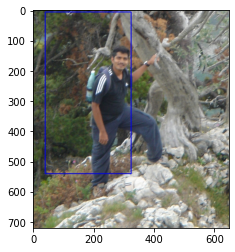

In [42]:
ik = cv2.imread("Results/Res_10.jpg")
rgb = cv2.cvtColor(ik, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)

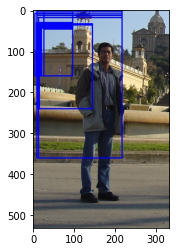

In [50]:
ik = cv2.imread("Results/Res_1.jpg")
rgb = cv2.cvtColor(ik, cv2.COLOR_BGR2RGB)
plt.imshow(rgb, cmap = plt.cm.Spectral)

In [17]:
# with open('all_bb_detections.pkl', 'wb') as fid:
#      pickle.dump(all_bb_detections, fid)
# with open('all_bb_detections.pkl', 'rb') as pickle_in:
#      all_bb_detections = pickle.load(pickle_in)

In [14]:
#Evaluation
import re
def load_annotation(prefix, lst):
    masks = {}
    with open(prefix + lst, 'r') as f:
        file_list = f.readlines()
    file_list = [prefix + '/'.join(i[:-1].split('/')[1:]) for i in file_list]
    for i, file in enumerate(file_list):
        with open(file, 'r', encoding='latin-1') as f:
            lines = f.readlines()
        masks[i] = []
        mask = None
        for line in lines:
            if mask is not None:
                match = re.match( r'Bounding box .* \(([0-9]+), ([0-9]+)\) - \(([0-9]+), ([0-9]+)\)', line)
                if match:
                    pt1 = (int(match.group(1)), int(match.group(2)))
                    pt2 = (int(match.group(3)), int(match.group(4)))
                    mask = cv2.rectangle(mask, pt1, pt2, 1, -1)
                    masks[i].append(mask)
            else:
                match = re.match( r'Image size.* ([0-9]+) x ([0-9]+) x ([0-9])', line)
                
                if match:
                    #print(match.group(1), match.group(2), match.group(3))
                    mask = np.zeros((int(match.group(2)), int(match.group(1))), dtype=np.uint8)
            """
            plt.figure()
            plt.imshow(mask)
            plt.show()
            """
        if mask is None:
            print(f"Error while parsing {file}")
            break
        #print(mask.shape)
        #masks[i].append(mask)
    print(f"Load {len(masks)} annotations.")
    return masks
        
test_gt_mask = load_annotation('./INRIAPerson/Test/', 'annotations.lst')

Load 288 annotations.


#IOU Calculation

IOU calculated over 100 test images.

In [27]:
def getIOU(box, ground_truth):
  intersection = np.sum(cv2.bitwise_and(box, ground_truth))
  union = np.sum(cv2.bitwise_or(box, ground_truth))
  if union == 0:
    return 1
  return float(intersection) /union 


all_ious = []
for i in range(100):
  predicted_iou = []
  for predicted_box in all_bb_detections[i]:
    max_iou = 0.0 
    #print(predicted_box.shape)
    for box in test_gt_mask[i]:
      #print(box.shape)
      iou_i_j = getIOU(box, predicted_box)
      max_iou = max(iou_i_j, max_iou)
      
      predicted_iou.append(max_iou)

  res_iou = np.sum(predicted_iou) / len(predicted_iou)
  all_ious.append(res_iou)

np.mean(all_ious)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


0.08369540682463536

In [ ]:
type(predicted_box)

# Problem 2: Image Classification with Bag of SIFT Representation + SVM Classifer(50 + 10 points)

## **Description**
---
In this problem, we will examine the task of image classification using bags of quantized local features and linear classifiers learned by support vector machines. We will implement a basic bag of words model and
classify images into one of 10 categories by training and testing on **a small subset** of **miniImagenet** dataset (downloaded from https://awesomeopensource.com/project/oscarknagg/few-shot).

Bag of words models are a popular technique for image classification inspired by
models used in natural language processing. The model ignores or downplays word
arrangement (spatial information in the image) and classifies based on a
histogram of the frequency of visual words. The visual word "vocabulary" is
established by clustering a large corpus of local features. See Szeliski chapter
14.4.1 for more details on category recognition with quantized features. In
addition, 14.3.2 discusses vocabulary creation and 14.1 covers classification
techniques.

## **0.Data Preparation(0 points)**
Load the data and show the sample of each class.

## **1.Bag of SIFT Representation (30 points)**
Before we can represent our training and testing images as bag of
feature histograms, we first need to establish a vocabulary of visual words. We
will form this vocabulary by sampling many local features from our training set
(10's or 100's of thousands) and then cluster them with k-means. The number of
k-means clusters is the size of our vocabulary and the size of our features. For
example, you might start by clustering many SIFT descriptors into k=50 clusters.
This partitions the continuous, 128 dimensional SIFT feature space into 50
regions. For any new SIFT feature we observe, we can figure out which region it
belongs to as long as we save the centroids of our original clusters. Those
centroids are our visual word vocabulary. 

Now we are ready to represent our training and testing images as histograms of
visual words. For each image we will densely sample many SIFT descriptors.
Instead of storing hundreds of SIFT descriptors, we simply count how many SIFT
descriptors fall into each cluster in our visual word vocabulary. This is done
by finding the nearest neighbor k-means centroid for every SIFT feature. Thus,
if we have a vocabulary of 50 visual words, and we detect 200 distinct SIFT
features in an image, our bag of SIFT representation will be a histogram of 50
dimensions where each bin counts how many times a SIFT descriptor was assigned
to that cluster. The total of all the bin-counts is 200. The histogram should be
normalized so that image size does not dramatically change the bag of features
magnitude.

a. {**10** points} Sample some keypoints and extract SIFT feature.

b. {**15** points} Do the clustering to fit the bag of SIFT model.

c. {**5** points} Extract the feature using the bag of SIFT model.</br>
**Note**: 
- Instead of using SIFT to detect invariant keypoints which is time-consuming,
  you are recommended to **densely sample keypoints** in a grid with certain step
  size (sampling density) and scale. 
- There are many design decisions and free parameters for the bag of SIFT
  representation (number of clusters, sampling density, sampling scales, SIFT
  parameters, etc.) so accuracy might vary.



**Hints**:
- Use [KMeans in Sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
  to do clustering and find the nearest cluster centroid for each SIFT feature;
- Use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object;
- Use [`cv2.Keypoint()`](https://docs.opencv.org/3.0-beta/modules/core/doc/basic_structures.html?highlight=keypoint#keypoint) to generate key points;
- Use `sift.compute()` to compute SIFT descriptors given densely sampled keypoints.

- Be mindful of RAM usage. Try to make the code more memory efficient, otherwise it could easily exceed RAM limits in Colab, at which point your session will crash.
- If your RAM is going to run out of space, use [gc.collect()](https://docs.python.org/3/library/gc.html) for the garbage collector to collect unused objects in  memory to free some space.
- Store data or features as NumPy arrays instead of lists. Computation on NumPy arrays is much more efficient than lists.

## **2.One-vs-all SVMs(20 points)**

You do not have to implement the support vector machine. However, linear
classifiers are inherently binary and we have a 10-way classification problem
(the library has handled it for you). To decide which of 10 categories a test
case belongs to, you will train 10 binary, one-vs-all SVMs. One-vs-all means
that each classifier will be trained to recognize 'bird' vs 'non-bird',
'cat' vs 'non-cat', etc. All 10 classifiers will be evaluated on each
test case and the classifier which is most confidently positive "wins". E.g. if
the 'cat' classifier returns a score of -0.2 (where 0 is on the decision
boundary), and the 'bird' classifier returns a score of -0.3, and all of the
other classifiers are even more negative, the test case would be classified as a
'cat' even though none of the classifiers put the test case on the positive
side of the decision boundary. When learning an SVM, you have a free parameter
**C** which controls how strongly regularized the model is. Your
accuracy will be very sensitive to **C**, so be sure to try many values.


**Hints**:
- Use SVM in
  [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
  (recommended) or
  [OpenCV](https://docs.opencv.org/3.0-alpha/modules/ml/doc/support_vector_machines.html)
  to do training and prediction.

**Note**: 
- **You need to get at least 20% accuracy to get full points for this problem.**

## **3.Bonus Problem(Bonus 10 points)**

You need to get at least **40%** accuracy to get the bonus. For this, you can use any methods you want.


## 0.Data Preparation
----

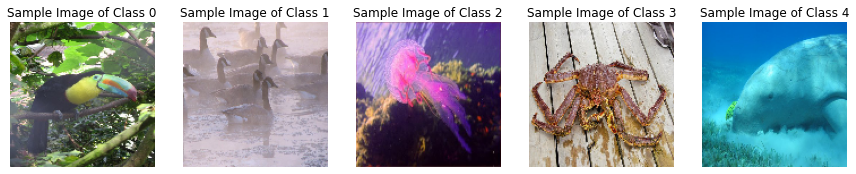

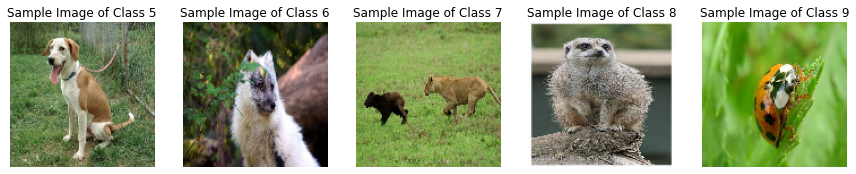

In [52]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import itertools
import time
import zipfile
import torch
import torchvision
import gc
import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict_train = pickle.load(fo, encoding='bytes')
        dict_test = pickle.load(fo, encoding='bytes')
    return dict_train, dict_test

# load data from pickle files and sample a small subset for this homework
train_data_dict, test_data_dict = unpickle('miniImageNet.pkl') 
train_label = train_data_dict['labels']  
train_data = train_data_dict['data']  

test_label = test_data_dict['labels']   
test_data = test_data_dict['data'] 

# reshape data
train_data = [d.reshape(3, 128, 128).transpose(1,2,0) for d in train_data]
test_data = [d.reshape(3, 128, 128).transpose(1,2,0) for d in test_data]

# plot 10 training images from 10 classes
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(i))
    plt.imshow(cv2.cvtColor(train_data[500*i], cv2.COLOR_BGR2RGB))
    plt.axis("off")
plt.show()
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title('Sample Image of Class {}'.format(i+5))
    plt.imshow(cv2.cvtColor(train_data[500*(i+5)], cv2.COLOR_BGR2RGB))
    plt.axis("off")
plt.show()

In [53]:
print(train_data[0].shape)
print(test_data[0].shape)

(128, 128, 3)
(128, 128, 3)


## 1.Bag of SIFT Representation
----

In [54]:
from sklearn import neighbors
from sklearn.cluster import KMeans
import time
import random
from sklearn import svm
from skimage import color
from skimage import io
from torch.utils.data import Dataset, DataLoader
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

np.random.seed(56)
start_time = time.time()

#Sample Dense keypoints and extract SIFT
size = [128, 128]
step = 16
scale = 8

def getKPs(step, size, scale):
  return [cv2.KeyPoint(i, j, scale) for i in range(step, size[0], step) for j in range(step, size[1], step)]

keypoints = getKPs(step, size, scale)
print('Step size: {} Scale: {}'.format(step, scale))
print('Keypoints: {}'.format(len(keypoints)))

sift = cv2.xfeatures2d.SIFT_create()
descriptors = []
for image in train_data:
  kp, des = sift.compute(image, keypoints)
  descriptors.extend(des)

print('Descriptors generated:{}'.format(len(descriptors)))

# K-Means of descriptors
clusters = 64

k_clf = KMeans(n_clusters=clusters, random_state=0)
kmeans = k_clf.fit(descriptors)

print("K Means Clusters generated")

#Bag of SIFT Model

image_histograms = []

for image in train_data:
  kp, des = sift.compute(image, keypoints)
  histogram = np.zeros(clusters)
  number_keypoints = np.size(kp)
  for d in des:
    index = kmeans.predict(des)
    histogram[index] += 1/number_keypoints
  image_histograms.append(histogram)

# Train K-Neighbors Classifer on Bag of Histograms
k = 30
knn_clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_clf.fit(np.array(image_histograms), train_label)

# Prediction

test_image_histograms = []
for image in test_data:
  kp, des = sift.compute(image, keypoints)
  
  histogram = np.zeros(clusters)
  number_keypoints = np.size(kp)
  for d in des:
    index = kmeans.predict(des)
    histogram[index] += 1/number_keypoints
    
  test_image_histograms.append(histogram)

pred = knn_clf.predict(test_image_histograms)

print('Time: {}s'.format(time.time() - start_time))
print("(Bag of SIFT Features) Accuracy of KNN classifier is {:.2f}%".format(accuracy_score(test_label, pred)*100))


Step size: 16 Scale: 8
Keypoints: 49
Descriptors generated:245000
K Means Clusters generated
Time: 1156.8634586334229s
(Bag of SIFT Features) Accuracy of KNN classifier is 29.20%


## 2.One-vs-all SVMs

In [55]:
from sklearn import svm
from sklearn.svm import SVC

clf = SVC(C=0.11, kernel='linear', probability=True, random_state=42)
clf.fit(np.array(image_histograms), train_label)

test_label_pred = clf.predict(test_image_histograms)

#The prediction is test_label_pred
accuracy = sum(np.array(test_label_pred) == test_label) / float(len(test_label))
print("The accuracy of Bag of SIFT Representation + one-vs-all SVMs model is {:.2f}%".format(accuracy*100))

The accuracy of Bag of SIFT Representation + one-vs-all SVMs model is 32.60%


In [ ]:
from torchvision import models
resnet = models.resnet101(pretrained=True)

## Submission guidelines
---
Your need to submit a single zip file to Blackboard described as follow.

Please generate a pdf file that includes a ***google shared link*** (explained in the next paragraph). This pdf file should be named as ***Surname_Givenname_SBUID_pa*\*.pdf** (example: Jordan_Michael_111234567_pa3.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_pa**** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_pa3
        |---INRIAPerson
        |---CSE527-PA3-fall21.ipynb
        |---miniImageNet.pkl
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter the TA's email: ***bjha@cs.stonybrook.edu***, ***li.wenchen@stonybrook.edu***, ***yifeng.huang@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **UNCHECK** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

To submit to Blackboard, zip ***Surname_Givenname_SBUID_pa*\*.pdf** and ***Surname_Givenname_SBUID_pa**** folder together and name your zip file as ***Surname_Givenname_SBUID_pa*\*.zip**. 

**DO NOT upload INRIA dataset to Blackboard.**

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_pa3' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Edstem. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Edstem and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

